## Task # 14:
This is Task # 14 overall and Task 4 of week 6
## Task # 04:

- In this task we will be working with the titanic dataset

In [2]:
#importing necessary regular libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#importing the titanic dataset from the local machine
fp = 'titanic.csv'
titanic_df = pd.read_csv(fp)

#check for columns with null values
print(titanic_df.columns[titanic_df.isnull().any()])

#a look at the dataset
titanic_df.head(3)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Pre Processing Of Data

#### Handling Null Values

In [33]:
#checking the null values percentage
nul_col = ['Age', 'Cabin', 'Embarked']
print(titanic_df[nul_col].isnull().sum()/titanic_df.shape[0]*100)

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [34]:
#from the above we see that the Cabin column has more than 50% of Null/Missing values so lets drop this column

#creating the copy of original dataset
titanic_df1 = titanic_df.copy()

#dropping Cabin
titanic_df1.drop('Cabin',axis = 1,inplace = True)

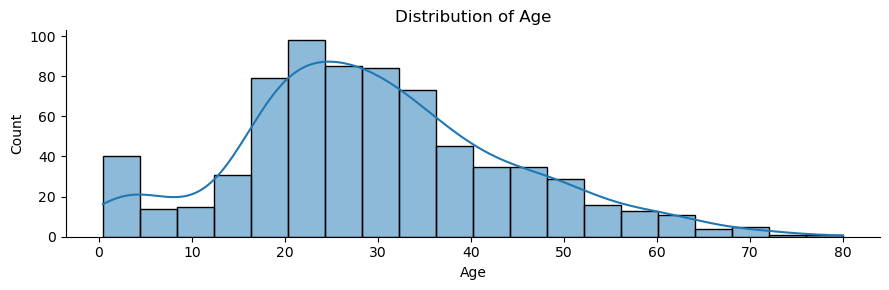

In [35]:
#now lets have a look at the distribution of the Age column 
sns.displot(titanic_df1['Age'],kde = True,height = 3,aspect = 3)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Frome the above visualization we can obsereve that we have a skewed distribution , so we will be handlin the null values with the median

In [36]:
# Fill missing ages with the median age
titanic_df1['Age'] = titanic_df1['Age'].fillna(titanic_df1['Age'].median())

- The Embarked Column has categorical values and also it has very low percentage of Null values so if we drop the Null values , so it wont effect the dataset that much , also as a categorical value we can replace it with the Mode ,So its upto our choice but in this Task we will drop the rows containing Null values

In [37]:
#dropping the Null Value Rows
titanic_df1 = titanic_df1.dropna(subset=['Embarked'])

In [38]:
#verifying the dataset for Null Values
titanic_df1.columns[titanic_df1.isnull().any()]

Index([], dtype='object')

- As now we can see that we have no columns that contains the Null vales

#### Encoding

In [39]:
# now lets check the columns which contains the object datatype and are possible categorical columns
titanic_df1.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

- Name and Ticket cannot be categorical column , while Sex,and Embarked could be 

In [40]:
# Using One Hot Encoding
titanic_df1 = pd.get_dummies(titanic_df1,columns=['Embarked','Sex'],dtype='int32')

In [44]:
# lets have a look at the dataset to see that if our values are encoded or not
titanic_df1.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",-0.563674,1,0,A/5 21171,-0.500240,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.669217,1,0,PC 17599,0.788947,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.255451,0,0,STON/O2. 3101282,-0.486650,0,0,1,1,0


- So Encoding of SeX and Embarked column is completed

#### Data Standardization 
- Data Standardization is not necessary incase of logistic regression or decision trees but still it can be a good practice and in some scenarios can have a useful impact

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Here we will be standardizing the Age and Fare columns
std_col = ['Age','Fare']
titanic_df1[std_col] = scaler.fit_transform(titanic_df1[std_col])

In [43]:
# a look at the standard deviation
print(titanic_df1['Age'].std())
print(titanic_df1['Fare'].std())

1.000562904632249
1.0005629046322495


- As we can see that standard deviation is about 1 so our data has been standardized